Title: Nonlinear Filters
Author: Thomas M. Breuel
Institution: UniKL

In [1]:

from scipy.ndimage import filters
def ims(image,**kw):
    size = kw.get("s",8)
    if "s" in kw: del kw["s"]
    subplots(1,1,figsize=(size,size))
    gray(); imshow(image,**kw)
def imp(image,**kw):
    subplots(1,1,figsize=(6,6))
    gray(); imshow(image,interpolation='nearest',**kw)
def imrow(*args,**kw):
    size = kw.get("s",8)
    if "s" in kw: del kw["s"]
    n = len(args)
    gray()
    subplots(1,n,figsize=(n*size,size))
    for i,im in enumerate(args):
        subplot(1,n,i+1); imshow(im,**kw)
def rescale(image):
    return (image-amin(image))/max(1e-4,amax(image)-amin(image))

# Nonlinear Filters

(nonlinear filters)

Nonlinear filters are those for which the linearity relationship breaks down:

$$ F[A+\lambda B] \neq F[A]+\lambda F[B] $$ 

for some $A$, $B$, $\lambda$

(common nonlinear filters)

- median filter
- minimum / maximum filter
- rank filters
- gamma correction
- binary morphology
- grayscale morphology
- convolutional neural network

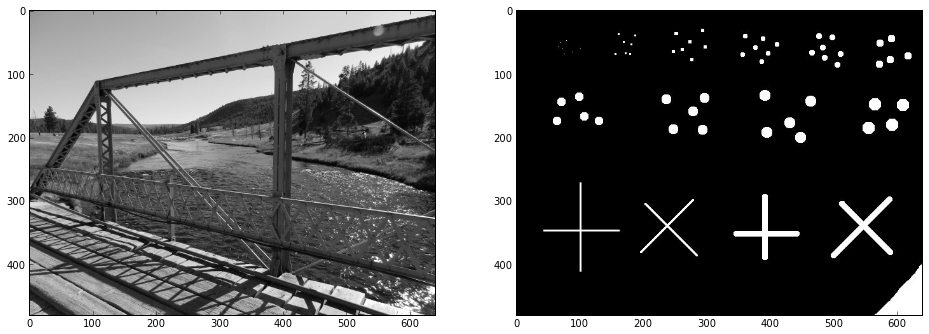

In [2]:
# test images
image = mean(imread("bridge.jpg")/255.0,axis=2)
test = mean(imread("testimage.jpg")/255.0,axis=2)
imrow(image,test)

# Median Filter

The median filter is similar to the box filter, but instead of 
the mean it uses the median to compute values over the local region.



In [9]:
from scipy.ndimage import filters
imrow(image,filters.median_filter(image,20))

(median filter difference)

It's useful to look at the difference between the original image and the median filter.

Essentially, this difference is a kind of _edge detector_, similar to taking the
difference between the image and its smoothed or locally averaged version.

The median filter therefore also removes fine detail from an image.
However, it does so in a way that is more complicated than linear filters.

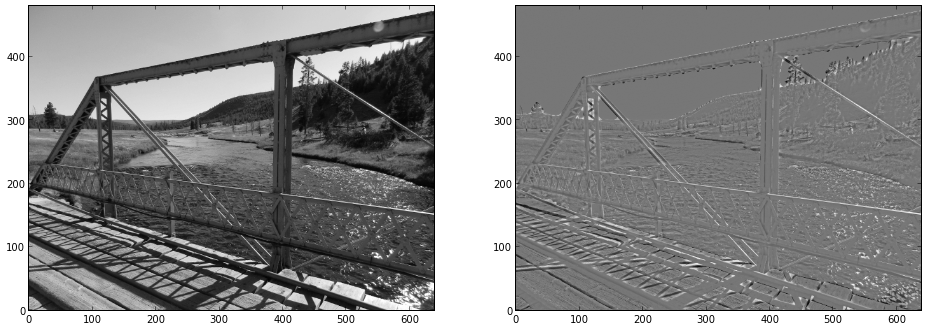

In [32]:
# median filter difference
imrow(image,image-filters.median_filter(image,10))

Computing the median filter is straightforward: we just compute the median over patches.  



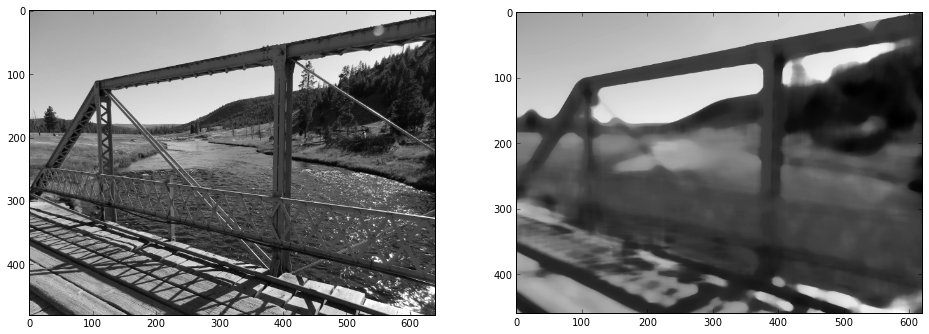

In [10]:
def mymf(image,r):
    w,h = image.shape
    return array([[median(image[i:i+r,j:j+r]) for j in range(h-r)] for i in range(w-r)])

imrow(image,mymf(image,20))

Most of the algebraic properties that we have for linear filters don't hold.
For example, the median filter is not separable 
(but an approximation is often computed as if it were).
More efficient algorithms keep a running histogram as a window
slides across the image.

(purpose and use)

The median filter can remove _outliers_ and _shot noise_, even independent of magnitude.



In [11]:
noisy = image+(rand(*image.shape)>0.98)
filtered = filters.median_filter(noisy,5)
imrow(noisy,filtered,abs(noisy-filtered))

(impulse response)

The impulse response for this filter isn't very useful: it's zero.
A linear filter with a zero impulse response always outputs zero, of course.
But for nonlinear filters, things work differently.



In [7]:
impulse = zeros((64,64)); impulse[32,32] = 1.0
imrow(impulse,filters.median_filter(impulse,5),interpolation='nearest')

# Rank Filters, Order Statistics

(rank filters)

The median filter is really just a special case of a rank filter.
With a rank filter, you take pixels from a neighborhood around a pixel,
you sort those pixels, and then you return a pixel from the sorted
list by rank.
Examples are 

- returning the minimum pixel
- returning the maximum pixel
- returning the median (50 percent of pixels have a lower value)
- returning some other fraction

That is, you could compute the rank filter by sorting all the pixels within a window and then taking the value at a particular rank (usually, there are more efficient ways of doing it)

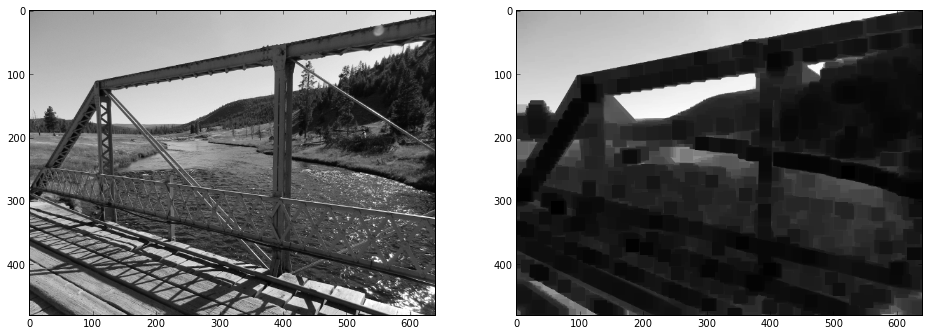

In [12]:
# minimum filter
imrow(image,filters.minimum_filter(image,20))

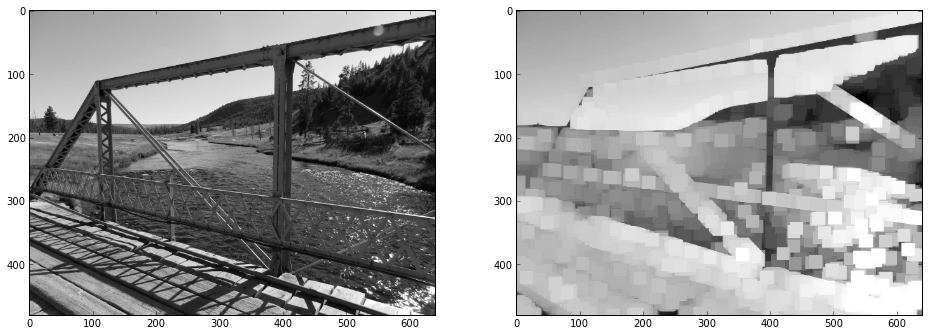

In [13]:
# maximum filter
imrow(image,filters.maximum_filter(image,20))

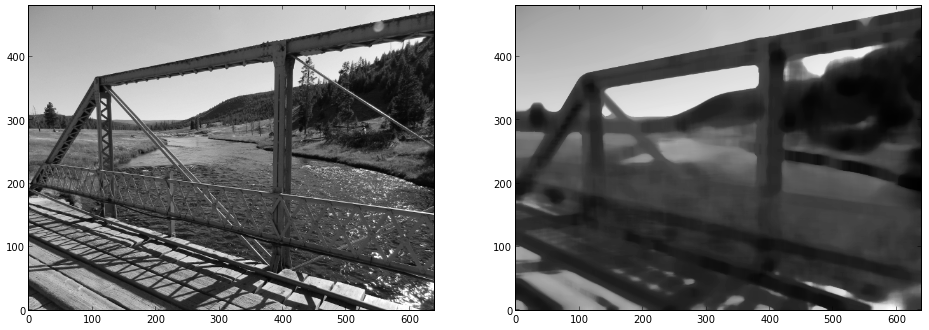

In [10]:
# percentile filter, 25 percent
imrow(image,filters.percentile_filter(image,25,20))

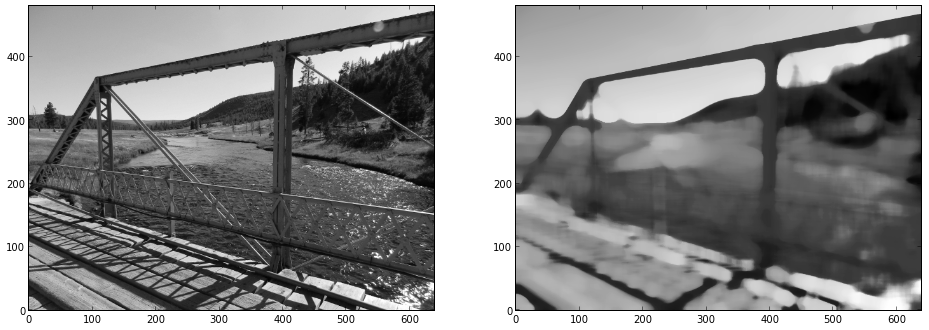

In [11]:
# percentile filter, 75 percent
imrow(image,filters.percentile_filter(image,75,20))